Importing the Libraries


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset

In [2]:
df=pd.read_csv("/content/householdtask3.csv")
df.head()

,year,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
0,2008,1560859,1087580,574406,69.7,36.8,100.0,35.9,2.7,46704,42394,26869,25132
1,2008,185965,71256,39405,38.3,21.2,11.9,29.9,2.6,23404,25270,14258,15824
2,2008,312376,191470,48424,61.3,15.5,20.0,40.0,2.3,16747,21145,13402,14408
3,2008,312333,196203,84171,62.8,26.9,20.0,34.7,2.8,31308,29855,18917,18266
4,2008,312240,217657,141318,69.7,45.3,20.0,31.5,3.0,49106,46561,26870,24672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         70 non-null     int64  
 1   tot_hhs      70 non-null     int64  
 2   own          70 non-null     int64  
 3   own_wm       70 non-null     int64  
 4   own_prop     70 non-null     float64
 5   own_wm_prop  70 non-null     float64
 6   prop_hhs     70 non-null     float64
 7   age          70 non-null     float64
 8   size         70 non-null     float64
 9   income       70 non-null     int64  
 10  expenditure  70 non-null     int64  
 11  eqv_income   70 non-null     int64  
 12  eqv_exp      70 non-null     int64  
dtypes: float64(5), int64(8)
memory usage: 7.2 KB


In [4]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
65    False
66    False
67    False
68    False
69    False
Length: 70, dtype: bool

Dropping the null values

In [5]:
df.dropna()

,year,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
0,2008,1560859,1087580,574406,69.7,36.8,100.0,35.9,2.7,46704,42394,26869,25132
1,2008,185965,71256,39405,38.3,21.2,11.9,29.9,2.6,23404,25270,14258,15824
2,2008,312376,191470,48424,61.3,15.5,20.0,40.0,2.3,16747,21145,13402,14408
3,2008,312333,196203,84171,62.8,26.9,20.0,34.7,2.8,31308,29855,18917,18266
4,2008,312240,217657,141318,69.7,45.3,20.0,31.5,3.0,49106,46561,26870,24672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2020,352564,213893,119637,60.7,33.9,20.1,36.9,2.8,69779,57351,38889,33468
66,2020,350182,235256,141104,67.2,40.3,19.9,35.0,3.0,88944,83038,48929,45978
67,2020,351328,288779,187838,82.2,53.5,20.0,39.6,2.6,104277,123424,62718,71985
68,2020,329588,156459,107753,47.5,32.7,18.8,31.1,3.2,69581,54141,35075,29684


Describing the skewness

In [6]:
df.skew()

year           0.000000
tot_hhs        3.320510
own            3.011323
own_wm         2.621901
own_prop      -0.632242
own_wm_prop   -0.005394
prop_hhs       3.314495
age            2.660460
size          -1.304436
income         0.951766
expenditure    1.009153
eqv_income     1.138729
eqv_exp        1.170277
dtype: float64

Log Transformation

In [16]:
import numpy as np

df['tot_hhs'] = np.log1p(df['tot_hhs'])
df['own'] = np.log1p(df['own'])
df['own_wm'] = np.log1p(df['own_wm'])
df['prop_hhs'] = np.log1p(df['prop_hhs'])
df['age'] = np.log1p(df['age'])


 Square Root Transformation

In [17]:
df['tot_hhs'] = np.sqrt(df['tot_hhs'])
df['own'] = np.sqrt(df['own'])
df['own_wm'] = np.sqrt(df['own_wm'])
df['prop_hhs'] = np.sqrt(df['prop_hhs'])
df['age'] = np.sqrt(df['age'])


Box-Cox Transformation

In [18]:
from scipy.stats import boxcox

df['tot_hhs'], _ = boxcox(df['tot_hhs'] + 1)
df['own'], _ = boxcox(df['own'] + 1)
df['own_wm'], _ = boxcox(df['own_wm'] + 1)
df['prop_hhs'], _ = boxcox(df['prop_hhs'] + 1)
df['age'], _ = boxcox(df['age'] + 1)


Handling Negative Skewness

Inverse Transformation

In [19]:
df['own_prop'] = 1 / (df['own_prop'] + 1)
df['size'] = 1 / (df['size'] + 1)


Square Transformation

In [20]:
df['own_prop'] = np.power(df['own_prop'], 2)
df['size'] = np.power(df['size'], 2)


Handling Minimal Skewness

In [21]:
df['income'] = np.log1p(df['income'])
df['expenditure'] = np.log1p(df['expenditure'])
df['eqv_income'] = np.log1p(df['eqv_income'])
df['eqv_exp'] = np.log1p(df['eqv_exp'])


Rechecking Skewness and Distribution

In [22]:
print(df.skew())


year           0.000000
tot_hhs        0.000000
own            0.024432
own_wm         0.002872
own_prop       3.465600
own_wm_prop   -0.005394
prop_hhs      -0.459988
age            0.000000
size           2.431116
income        -0.072054
expenditure    0.025940
eqv_income     0.291674
eqv_exp        0.248525
dtype: float64


In [24]:
df.shape

(70, 13)

In [25]:
df.describe()

,year,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2014.000000,3.566635e-02,4.102373,4.256098,0.000317,30.348571,0.142632,4.087271e-02,0.078755,10.818579,10.692778,10.316056,10.201918
std,4.273274,2.096698e-17,0.115077,0.170492,0.000300,14.010004,0.000029,6.319504e-14,0.020034,0.514437,0.479436,0.448045,0.423487
min,2008.000000,3.566635e-02,3.728626,3.843825,0.000126,5.100000,0.142503,4.087271e-02,0.056689,9.726034,9.705890,9.503234,9.307104
25%,2011.000000,3.566635e-02,4.073947,4.126944,0.000179,15.850000,0.142632,4.087271e-02,0.069252,10.413299,10.305802,9.975745,9.897717
50%,2014.000000,3.566635e-02,4.102990,4.289308,0.000235,32.650000,0.142632,4.087271e-02,0.073046,10.867161,10.711562,10.256096,10.156452
75%,2017.000000,3.566635e-02,4.137736,4.355183,0.000314,42.050000,0.142632,4.087271e-02,0.081633,11.148827,10.981507,10.566790,10.433877
max,2020.000000,3.566635e-02,4.397675,4.633572,0.001765,58.200000,0.142707,4.087271e-02,0.147929,11.895961,11.723389,11.284870,11.184227


In [26]:
df.std()

year           4.273274e+00
tot_hhs        2.096698e-17
own            1.150773e-01
own_wm         1.704922e-01
own_prop       3.000508e-04
own_wm_prop    1.401000e+01
prop_hhs       2.912982e-05
age            6.319504e-14
size           2.003449e-02
income         5.144366e-01
expenditure    4.794364e-01
eqv_income     4.480448e-01
eqv_exp        4.234870e-01
dtype: float64

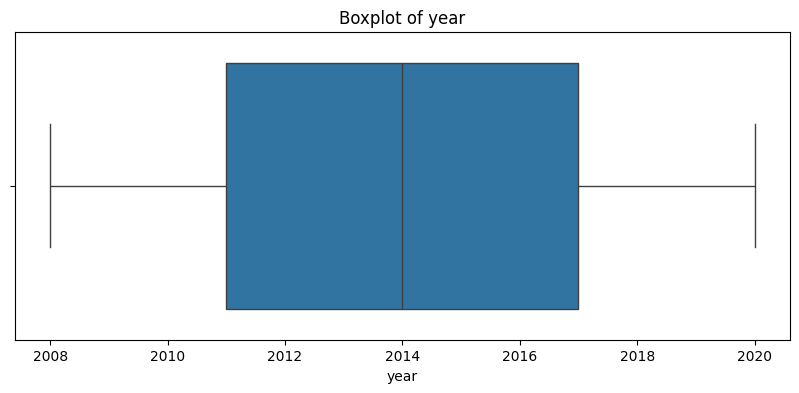

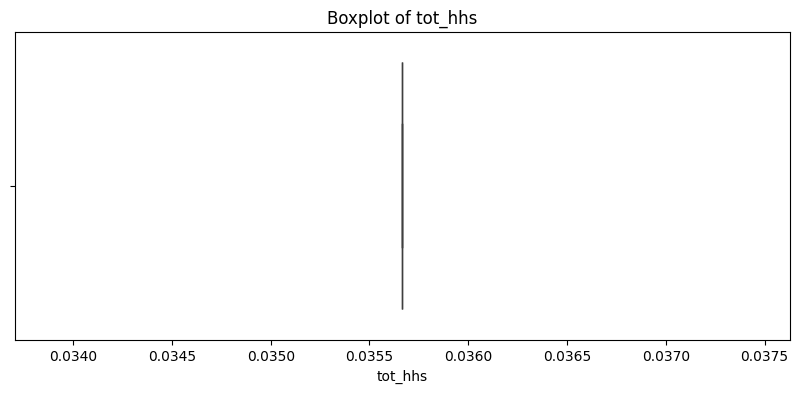

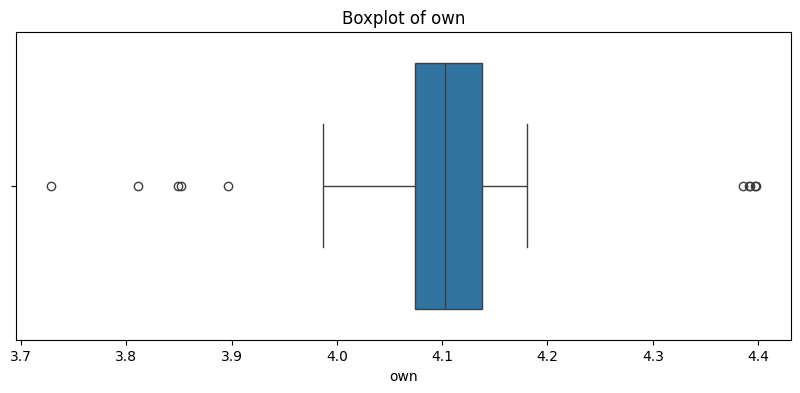

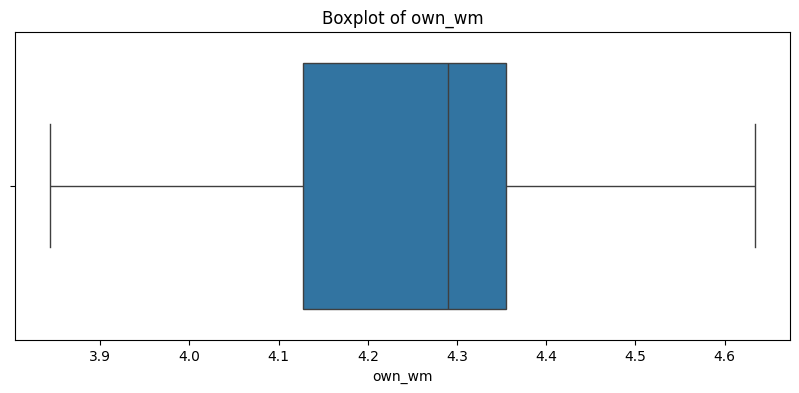

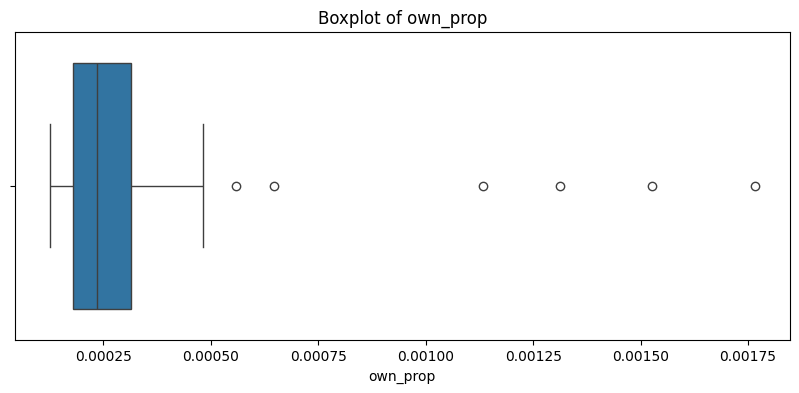

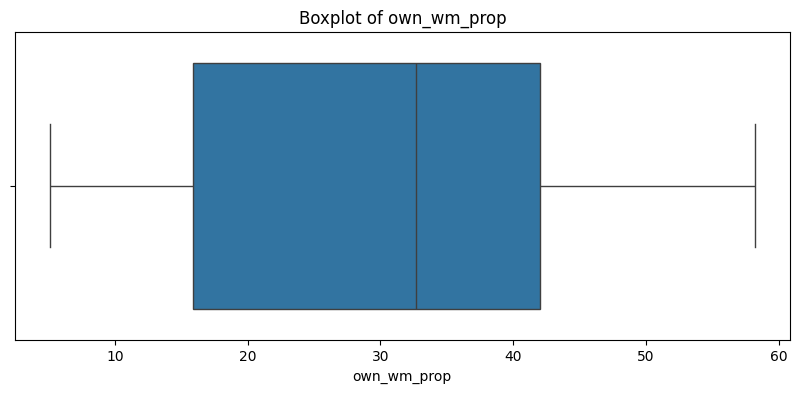

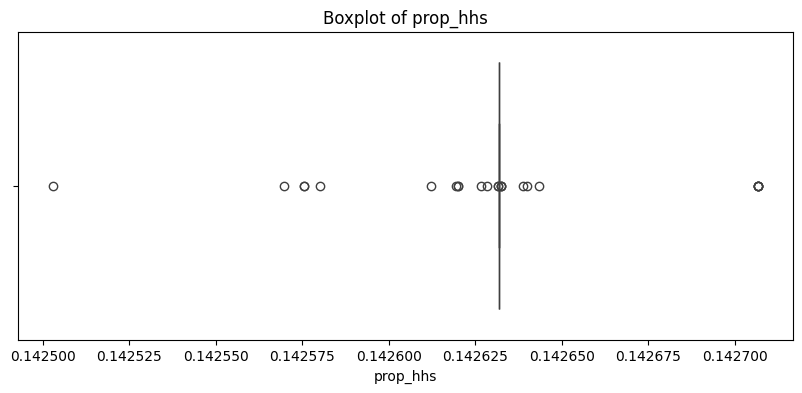

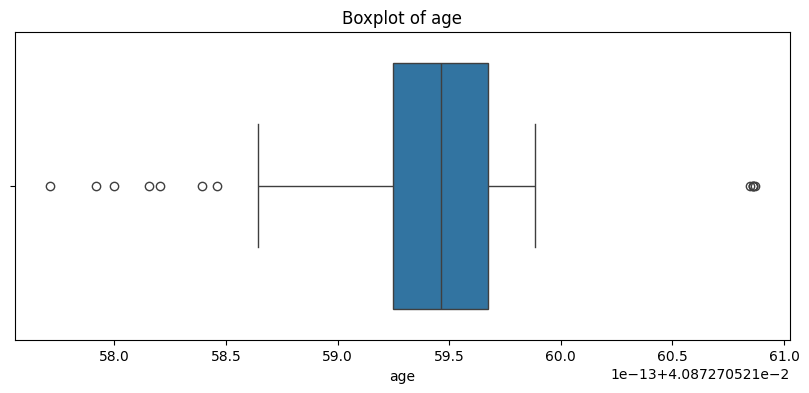

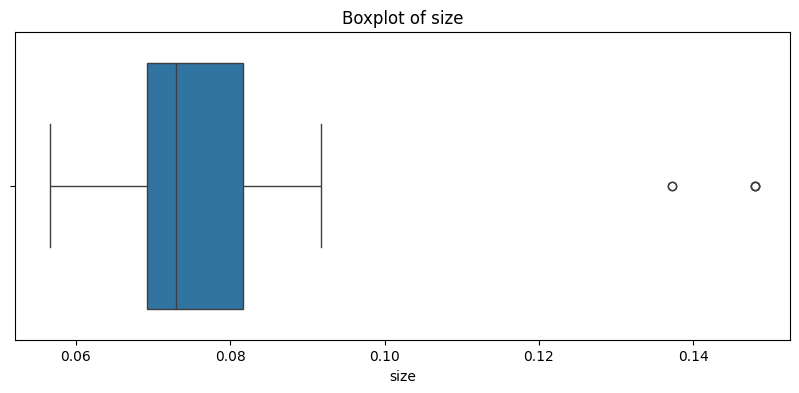

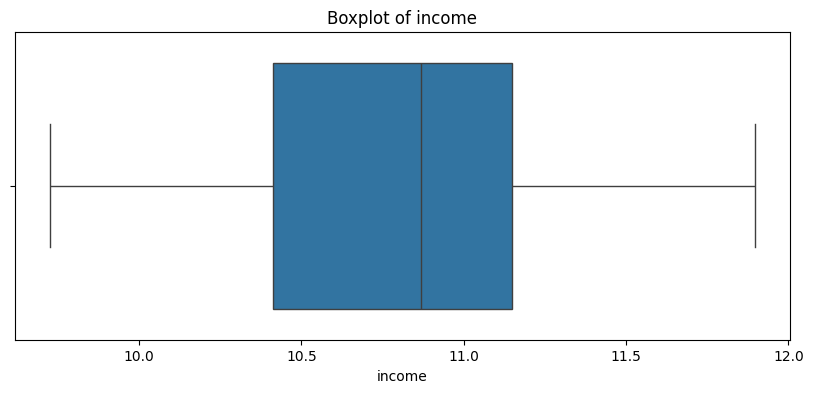

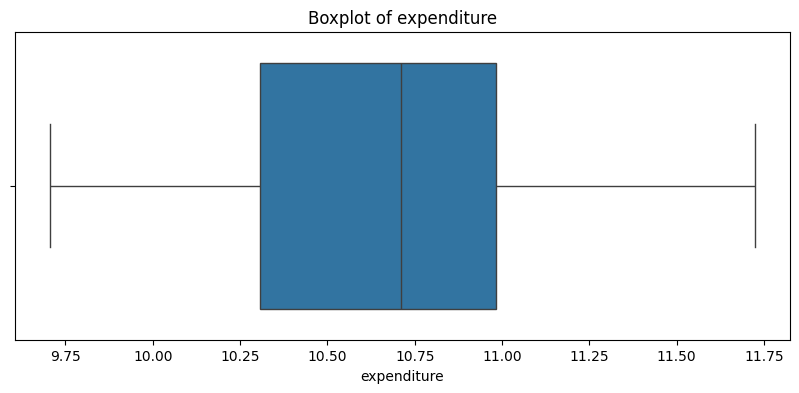

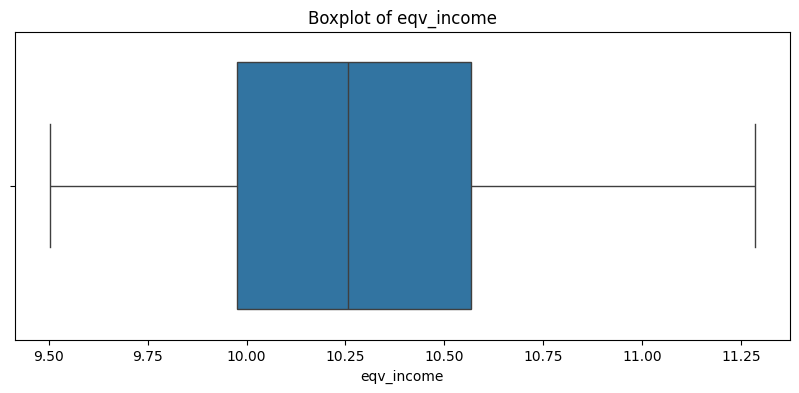

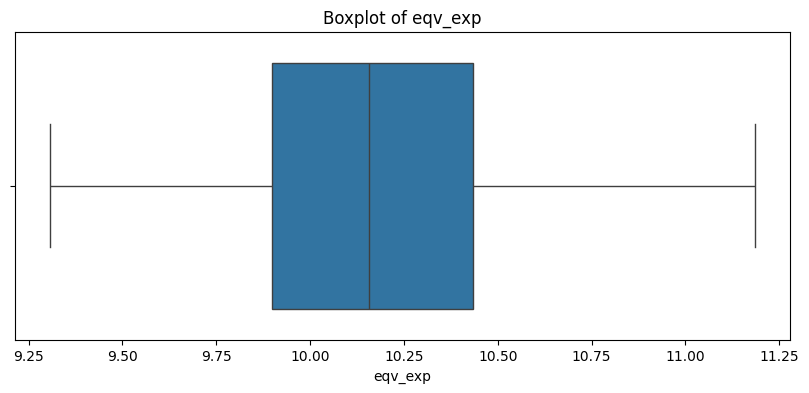

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


OUTLIERS

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_data = df[outliers]
print(outlier_data)


    year   tot_hhs       own    own_wm  own_prop  own_wm_prop  prop_hhs  \
0   2008  0.035666  4.391804  4.633483  0.000200         36.8  0.142707   
1   2008  0.035666  3.896187  4.072202  0.000647         21.2  0.142576   
12  2008  0.035666  3.994668  4.217672  0.000427         30.5  0.142612   
13  2008  0.035666  4.139572  3.862121  0.000127          5.1  0.142628   
14  2011  0.035666  4.385390  4.614934  0.000228         32.6  0.142707   
15  2011  0.035666  3.852237  3.989643  0.001134         13.8  0.142580   
26  2011  0.035666  3.987260  4.219891  0.000559         27.9  0.142619   
27  2011  0.035666  4.144434  3.956918  0.000139          7.3  0.142632   
28  2014  0.035666  4.392297  4.625715  0.000219         33.7  0.142707   
29  2014  0.035666  3.811188  3.988845  0.001526         14.5  0.142570   
37  2014  0.035666  4.105784  4.299066  0.000219         34.4  0.142632   
40  2014  0.035666  4.006625  4.238679  0.000481         29.6  0.142620   
41  2014  0.035666  4.172